In [2]:
import pandas as pd
import sqlite3
import contextlib 
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import g3read as g
import pp
u = pp.pint()

DB="/tmp/ciao_1e4_22_06_2018.sql"



In [3]:
def simul(q):
    with contextlib.closing(sqlite3.connect(DB)) as con:
        with con as cur:
           return pd.read_sql_query(q, cur)

In [4]:
df = simul ("""
select * from fof inner join snap on fof.snap_id=snap.id
""")

In [5]:
rdf = df#.sample(n=1000)

In [8]:
np.sort(rdf.keys())

array(['a', 'bgma', 'bgpo0', 'bgpo1', 'bgpo2', 'bgra', 'c200c',
       'end_subfind_file', 'fossilness', 'fossilness_mcent',
       'fossilness_msat', 'fsub', 'glen', 'goff', 'gpos0', 'gpos1',
       'gpos2', 'i_file', 'i_in_file', 'id', 'id', 'id_cluster', 'lgas0',
       'lgas1', 'lgas2', 'lgas3', 'lgas4', 'lgas5', 'm200', 'm25k',
       'm500', 'm5cc', 'mcon', 'mcri', 'mgas0', 'mgas1', 'mgas2', 'mgas3',
       'mgas4', 'mgas5', 'mgas6', 'mstr0', 'mstr1', 'mstr2', 'mstr3',
       'mstr4', 'mstr5', 'mtot', 'mvir', 'name', 'ncon', 'nsub', 'r200',
       'r25k', 'r500', 'r5cc', 'rcon', 'rcri', 'redshift', 'rtot', 'rvir',
       'simulation_id', 'snap_id', 'start_subfind_file', 'tag', 'tgas0',
       'tgas1', 'tgas2', 'tgas3', 'tgas4', 'tgas5', 'virialness_beta',
       'virialness_es', 'virialness_es_gas', 'virialness_eta',
       'virialness_k', 'virialness_k_gas', 'virialness_w',
       'virialness_w_gas', 'ygas0', 'ygas1', 'ygas2', 'ygas3', 'ygas4',
       'ygas5'], dtype=object)

In [18]:
u.define('hubble = 0.704')


TypeError: 'Unit' object is not callable

In [23]:
rdf.fossilness

215698      0.000000
348239           NaN
480164           NaN
437958           NaN
463404           NaN
402494           NaN
358947           NaN
472452           NaN
146198      0.000000
277581      0.000000
426175           NaN
114467      7.630250
102307      1.772350
20075      26.476000
154580      5.351850
359935           NaN
104976      0.794466
364215           NaN
179982      1.394220
258626      1.243960
346510           NaN
15383            NaN
139221     26.122500
461513           NaN
37300       4.639710
177882     14.203000
354497           NaN
202198      4.502490
92285     635.107000
25043       5.442260
             ...    
206702      0.000000
436856           NaN
157468      4.931980
51200       2.954120
436387           NaN
94803       8.199100
214491     14.252300
383058           NaN
286547      1.234630
357895           NaN
87971       2.437180
71931       5.384710
39267     466.303000
87958       2.559040
20593       8.398500
62632       3.425830
375208       

<IPython.core.display.Javascript object>


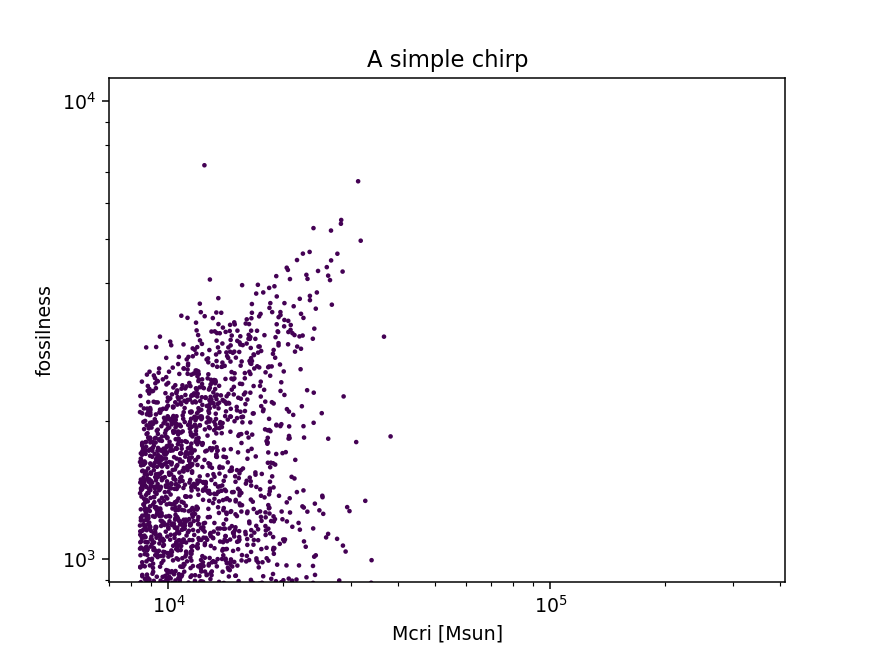

In [9]:
f,a = plt.subplots(1,1)
#a.scatter( (u.cmass*rdf.mcri).to(u.Msun),rdf.fossilness,s=1)

a.scatter( rdf.mcri,rdf.fossilness,c=rdf.redshift, s=2)
a.set_title('A simple chirp')
a.set_xscale('log')
a.set_yscale('log')
a.set_xlabel("Mcri [Msun]")

a.set_ylabel("fossilness")

f.show()